#  EMPLOYEE FUTURE PREDICTION


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


#DATA HANDLING & PREPROCESSING

In [ ]:
df.LeaveOrNot.value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

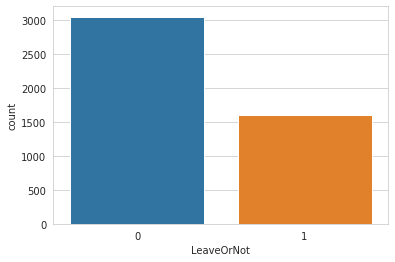

In [ ]:
sns.countplot(x="LeaveOrNot", data=df)
plt.show()

In [ ]:
labelencoder=LabelEncoder()
df['Education']=labelencoder.fit_transform(df['Education'])
df['City']=labelencoder.fit_transform(df['City'])
df['Gender']=labelencoder.fit_transform(df['Gender'])
df['EverBenched']=labelencoder.fit_transform(df['EverBenched'])

df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [ ]:
df=df.dropna()
y = df.LeaveOrNot.values
x = df.drop(['LeaveOrNot'], axis = 1)

In [ ]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


#SPLITING TRAINING & TESTING SETS

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

#ALGORITHMS

##1.LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
accuracies = {}
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc1=metrics.accuracy_score(y_test, pred)
print(acc1)
acc = lr.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))
print("confuision matrix")
print(confusion_matrix(y_test,pred))

0.7013963480128894
Test Accuracy 70.14%
confuision matrix
[[545  74]
 [204 108]]


##2.KNN ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
print("KNN-{} Score: {:.2f}%".format(7, knn.score(x_test, y_test)*100))
accuracies['KNN'] = knn.score(x_test, y_test)*100
print("confuision matrix")
print(confusion_matrix(y_test,pred))

KNN-7 Score: 76.69%
confuision matrix
[[559  60]
 [157 155]]


##SUPPORT VECTOR MACHINE(SVM)

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
pred=svm.predict(x_test)
acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))
print("confuision matrix")
print(confusion_matrix(y_test,pred))

Test Accuracy of SVM Algorithm: 66.49%
confuision matrix
[[619   0]
 [312   0]]


##DECISION TREE ALGORITHM

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train, y_train)
pred=dtc.predict(x_test)
acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))
print("confuision matrix")
print(confusion_matrix(y_test,pred))

Decision Tree Test Accuracy 81.10%
confuision matrix
[[543  76]
 [100 212]]


##RANDOM FOREST ALGORITHM

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100
pred=rf.predict(x_test)
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
print("confuision matrix")
print(confusion_matrix(y_test,pred))

Random Forest Algorithm Accuracy Score : 82.28%
confuision matrix
[[555  64]
 [101 211]]


##COMPARISION OF ALL MODELS

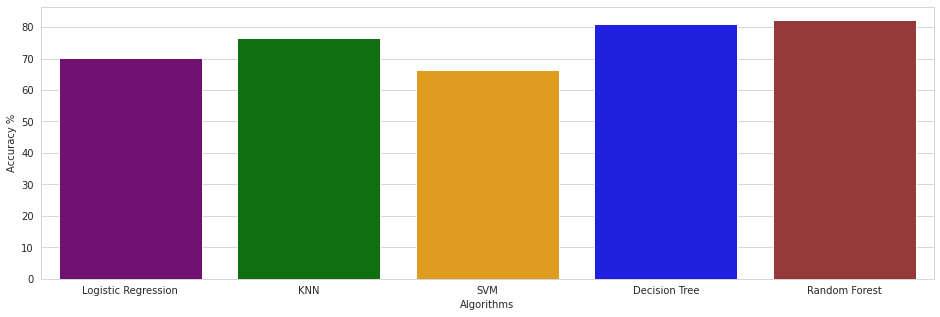

In [ ]:
colors = ["purple", "green", "orange","BLUE","BROWN",]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()